In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split

In [3]:
train_data= pd.read_csv('C:\\Users\\HP\\Desktop\\data.csv')

In [4]:
feature_cols=['location',	'country' ,	'gender' ,	'age' ,	'vis_wuhan',	'from_wuhan',	'symptom1'	,'symptom2'	,'symptom3'	,'symptom4'	,'symptom5'	,'symptom6', 'diff_sym_hos'
]
x=train_data[feature_cols]
y=train_data.result
# Get 70% of the dataset as the training set. Put the remaining 30% in temporary variables: x_test and y_test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
# Split the 30% subset above into two: one half for cross validation and the other for the test set
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1)


See the correlation between features

<AxesSubplot: >

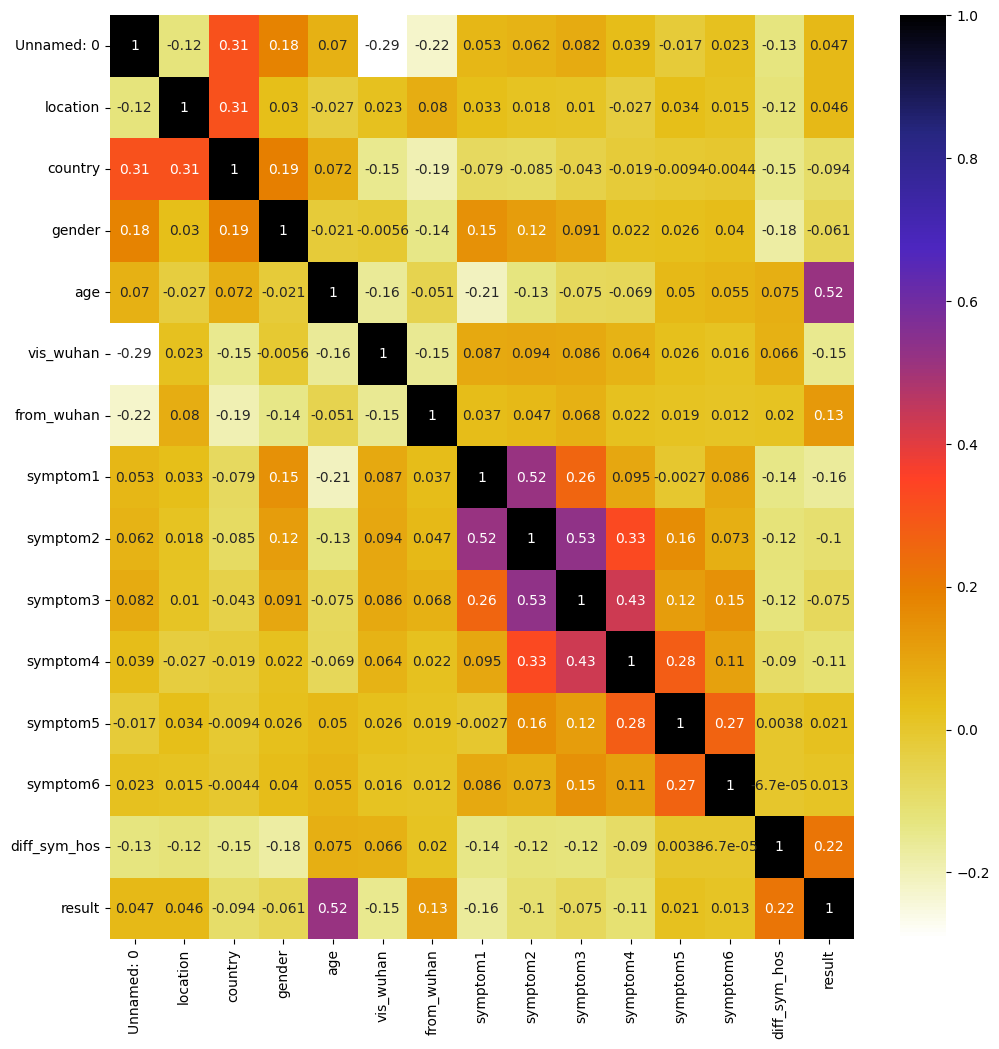

In [5]:
cor=train_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
# there are no features that are highyly dependent on each other

Try to make feature selection and apply LDA

In [6]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#lda = LDA(n_components=1)
#x_train = lda.fit_transform(x_train, y_train)
#x_test = lda.transform(x_test)

Using LDA decreses the accuracy and the other scores.

Results before tuning the parameters

In [7]:
model = SVC() 
model.fit(x_train, y_train)
# print prediction results before tuning
predictions = model.predict(x_test)
#results before applying any tuning to the hyperparameters
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       116
           1       0.83      0.36      0.50        14

    accuracy                           0.92       130
   macro avg       0.88      0.67      0.73       130
weighted avg       0.92      0.92      0.91       130



In [8]:
from sklearn import metrics 
print("Accuracy ",metrics.accuracy_score(y_test,predictions))
print("Precison ",metrics.precision_score(y_test,predictions))
print("roc score",metrics.roc_auc_score(y_test,predictions))#row curve is the best method

Accuracy  0.9230769230769231
Precison  0.8333333333333334
roc score 0.6742610837438424


Results after tuning the hyperparameters

Try tuning the hyperparameters using the  grid search to choose appropriate values to the c , gamma and the kernel.

where C is the regularization parameter that controls the trade-off between misclassifications and width of the margin.
gamma is how far the influence of a single training example reaches. (small gamma means far , large means close).
kernel is the distribution curve or the decision surface.

rbf is the radial basis function which uses exponent of the squared ecludien distance between the features divided by 2*standard deviation(sigma) , it is used to transform n-dimension input to m-dimension output also make classification line more powerful. 

In [9]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.884 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.876 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.876 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.876 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.884 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.876 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.876 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.876 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.883 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.884 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [29]:
#try to test on the validation data
grid_predictions1 = grid.predict(x_validate)
# print classification report
print(classification_report(y_validate, grid_predictions1))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.89      0.76      0.82        21

    accuracy                           0.95       129
   macro avg       0.92      0.87      0.89       129
weighted avg       0.94      0.95      0.94       129



In [31]:
from sklearn import metrics
print("Support Vector machine model accuracy(in %):", metrics.accuracy_score(y_validate,grid_predictions1)*100) 
print("Precision",metrics.precision_score(y_validate,grid_predictions1))
print("f1 score",metrics.f1_score(y_validate,grid_predictions1))#mean of recall and precision
print("recall score",metrics.recall_score(y_validate,grid_predictions1))
print("roc score",metrics.roc_auc_score(y_validate,grid_predictions1))


Support Vector machine model accuracy(in %): 94.57364341085271
Precision 0.8888888888888888
f1 score 0.8205128205128205
recall score 0.7619047619047619
roc score 0.8716931216931217


In [32]:
#try to test on the testing data
grid_predictions2 = grid.predict(x_test)
# print classification report
print(classification_report(y_test, grid_predictions2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       116
           1       1.00      0.86      0.92        14

    accuracy                           0.98       130
   macro avg       0.99      0.93      0.96       130
weighted avg       0.98      0.98      0.98       130



In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, grid_predictions2))
pd.crosstab(y_test, grid_predictions2, rownames=['True'], colnames=['Predicted'], margins=True)

[[116   0]
 [  2  12]]


Predicted,0,1,All
True,,,
0,116,0,116
1,2,12,14
All,118,12,130


In [35]:
from sklearn import metrics
print("Support Vector machine model accuracy(in %):", metrics.accuracy_score(y_test,grid_predictions2)*100)
print("roc score",metrics.roc_auc_score(y_test,grid_predictions2))

Support Vector machine model accuracy(in %): 98.46153846153847
roc score 0.9285714285714286


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


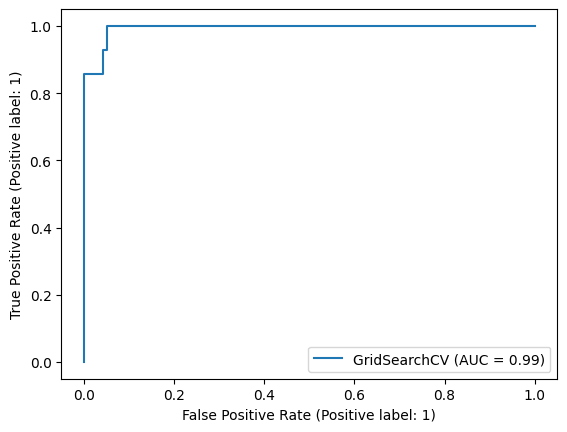

In [36]:
from sklearn import metrics
metrics.plot_roc_curve(grid,x_test,y_test)


Use the linear kernel function for tuning

In [23]:
from sklearn import svm
model1=svm.SVC(kernel='linear')
model1.fit(x_train,y_train)
pred=model1.predict(x_test)


In [24]:
from sklearn import metrics 
print("Accuracy ",metrics.accuracy_score(y_test,pred)) 
print("Precision",metrics.precision_score(y_test,pred))
print("f1 score",metrics.f1_score(y_test,pred))#mean of recall and precision
print("recall score",metrics.recall_score(y_test,pred))
print("roc score",metrics.roc_auc_score(y_test,pred))

Accuracy  0.9384615384615385
Precision 0.875
f1 score 0.6363636363636364
recall score 0.5
roc score 0.7456896551724139


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


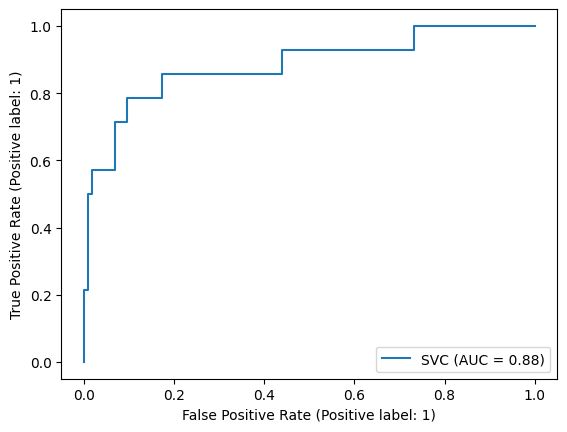

In [25]:
from sklearn import metrics
metrics.plot_roc_curve(model1,x_test,y_test)

In [26]:
from sklearn import svm
model2=svm.SVC(kernel='rbf')
model2.fit(x_train,y_train)
pred1=model2.predict(x_test)

In [27]:
from sklearn import metrics 
print("Accuracy ",metrics.accuracy_score(y_test,pred1)) 
print("Precision",metrics.precision_score(y_test,pred1))
print("f1 score",metrics.f1_score(y_test,pred1))#mean of recall and precision
print("recall score",metrics.recall_score(y_test,pred1))
print("roc score",metrics.roc_auc_score(y_test,pred1))

Accuracy  0.9230769230769231
Precision 0.8333333333333334
f1 score 0.5
recall score 0.35714285714285715
roc score 0.6742610837438424


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


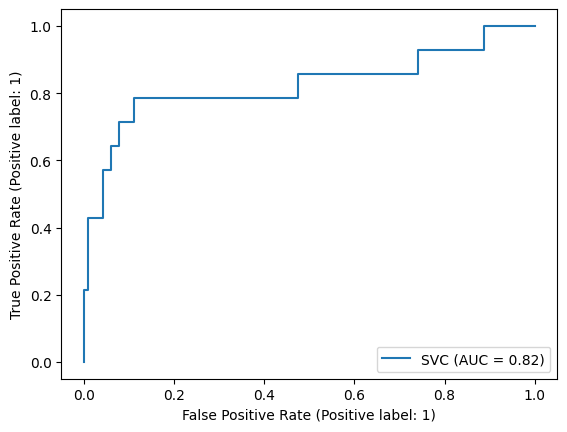

In [28]:
from sklearn import metrics
metrics.plot_roc_curve(model2,x_test,y_test)

Try tuning the hyperparameters using the randomized grid search making appropriate values to the c , gamma and the kernel

In [37]:
param_dist = {
          'rbf_svm__C': [1, 10, 100, 1000], 
          'rbf_svm__gamma': [0.001, 0.0001], 
          'rbf_svm__kernel': ['rbf', 'linear'],
}
# create pipeline with a scaler 
steps = [('scaler', StandardScaler()), ('rbf_svm', SVC())]
pipeline = Pipeline(steps)
# do search
search = RandomizedSearchCV(pipeline, 
param_distributions=param_dist, n_iter=50)
search.fit(x_train, y_train)
#try to test on the test data
random_search = search.predict(x_test)
print(classification_report(y_test, random_search))


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       116
           1       0.86      0.43      0.57        14

    accuracy                           0.93       130
   macro avg       0.90      0.71      0.77       130
weighted avg       0.93      0.93      0.92       130



In [38]:
from sklearn import metrics 
print("Accuracy ",metrics.accuracy_score(y_test,random_search)) 
print("Precision",metrics.precision_score(y_test,random_search))
print("f1 score",metrics.f1_score(y_test,random_search))#mean of recall and precision
print("recall score",metrics.recall_score(y_test,random_search))
print("roc score",metrics.roc_auc_score(y_test,random_search))

Accuracy  0.9307692307692308
Precision 0.8571428571428571
f1 score 0.5714285714285714
recall score 0.42857142857142855
roc score 0.7099753694581281


In [20]:
predicate = pd.DataFrame(random_search)     
predicate

,0
0,0
1,0
2,1
3,0
4,0
...,...
125,0
126,0
127,0
128,1


Measuring the accuracy

In [21]:
from sklearn import metrics
print("Support Vector machine model accuracy(in %):", metrics.accuracy_score(y_test,random_search)*100)

Support Vector machine model accuracy(in %): 93.07692307692308


Notes on the results of support vector machine algorithm
1. The model's ability to predict 1 is 100 % after using the grid search algorithm , having recall 86% it is where your model fails a bit -> which means he only detected as 1 86% of all ill people available.
2. f1-score is a quantity that tries to combine precision and recall in one number to penalize models that despite having high accuracy , the accuracy after tuning is 98.46 %.
3. Confusion matrix  whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.
4. After using the randomized grid search results was precision of class 1 is 86 % and the recall is 43 %.
5. The accuracy after applying the randomized grid search is 93.1 %.